In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
palette = sns.color_palette("Set2")
palette

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [4]:
palette = [palette[0], palette[2], palette[1]]
palette

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

In [10]:
losses_paths = ['plots_data/am_loss.csv', 
                'plots_data/sm_loss.csv', 
                'plots_data/ssm_loss.csv']
ticks = np.linspace(0,1e5,6)
labels = [f'{int(s)}' for s in ticks/1e3]
labels[1:] = [s + 'k' for s in labels[1:]]
print(labels)
titles = ['Action Matching', 'Annealed Langevin + SM', 'Annealed Langevin + SSM']

['0', '20k', '40k', '60k', '80k', '100k']


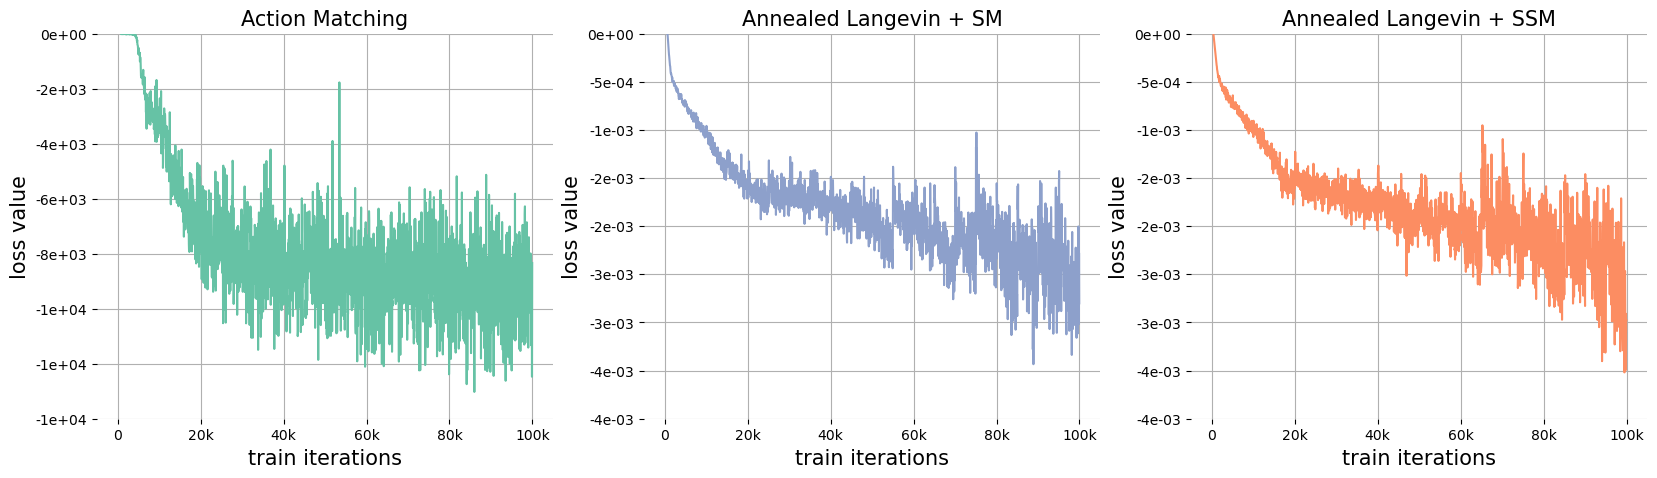

In [11]:
plt.subplots(figsize=(20,5))
fs = 15
for i in range(3):
    df = pd.read_csv(losses_paths[i])
    plt.subplot(1,3,i+1)
    plt.plot(df[df.columns[0]], df[df.columns[1]], c=palette[i])
    plt.ylim(top=0)
    plt.box(False)
    plt.xticks(ticks, labels)
    locs, _ = plt.yticks()
    plt.yticks(locs, [f'{l:.0e}' for l in locs])
    plt.title(titles[i], fontsize=fs)
    plt.xlabel('train iterations', fontsize=fs)
    plt.ylabel(f'loss value', fontsize=fs)
    plt.grid()
plt.savefig('losses_se.png', bbox_inches='tight')

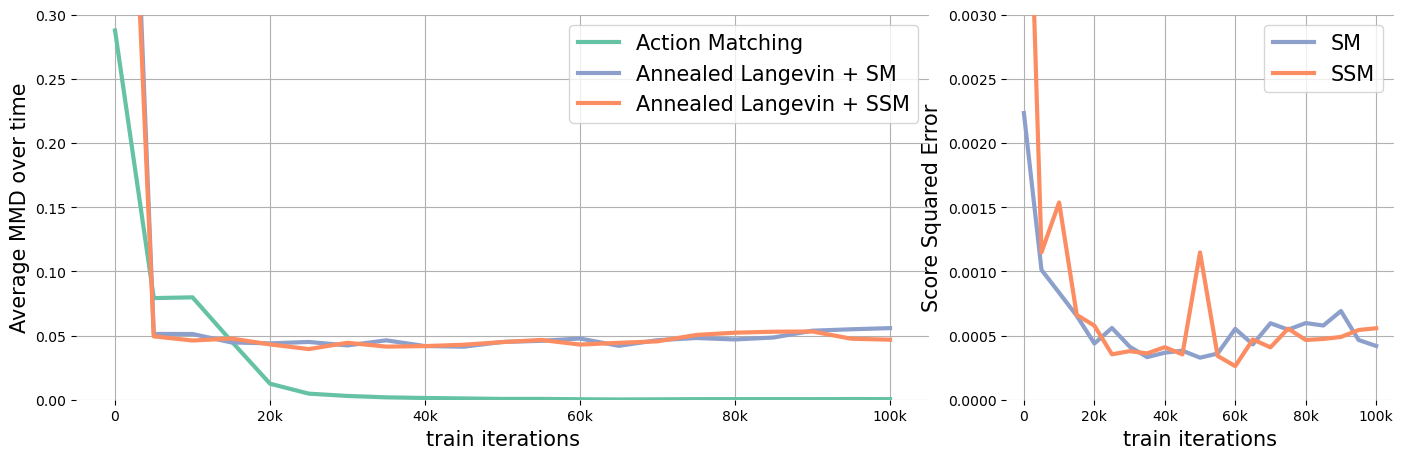

In [12]:
# fig = plt.figure(figsize=(16, 5))
plt.subplots(figsize=(17,5))
fs = 15
df = pd.read_csv('plots_data/mmd.csv')
ids = [4,1,7]
plt.subplot2grid((1,3),(0,0),colspan=2)
plt.plot(df[df.columns[0]], df[df.columns[ids[0]]], c=palette[0], label=titles[0], lw=3)
plt.plot(df[df.columns[0]], df[df.columns[ids[1]]], c=palette[1], label=titles[1], lw=3)
plt.plot(df[df.columns[0]], df[df.columns[ids[2]]], c=palette[2], label=titles[2], lw=3)
plt.box(False)
plt.ylim(bottom=0.0, top=0.3)
plt.xticks(ticks, labels)
plt.ylabel('Average MMD over time', fontsize=fs)
plt.xlabel('train iterations', fontsize=fs)
plt.legend(fontsize=fs)
plt.grid()

plt.subplot2grid((1,3),(0,2))
df = pd.read_csv('plots_data/scores.csv')
plt.plot(df[df.columns[0]], df[df.columns[ids[1]]], c=palette[1], label='SM', lw=3)
plt.plot(df[df.columns[0]], df[df.columns[ids[2]]], c=palette[2], label='SSM', lw=3)
plt.box(False)
plt.xticks(ticks, labels)
plt.ylim(bottom=0.0, top=3e-3)
plt.ylabel('Score Squared Error', fontsize=fs)
plt.xlabel('train iterations', fontsize=fs)
plt.legend(fontsize=fs)
plt.grid()
plt.savefig('mmd_se.png', bbox_inches='tight')

In [26]:
df = pd.read_csv('plots_data/mmd.csv')
ids = [4,1,7]
for i in range(3):
    print(titles[i])
    mmd_values = df[df[df.columns[0]] >= 40_000][df.columns[ids[i]]]
    print(mmd_values.mean(), mmd_values.std())

Action Matching
0.0005656338655031154 0.00030550214214944405
Annealed Langevin + SM
0.04754675810153662 0.004791447079409513
Annealed Langevin + SSM
0.04708394729174094 0.003959025635320524
